# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
data = pd.read_csv("Data\Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<AxesSubplot:xlabel='Level', ylabel='Salary'>

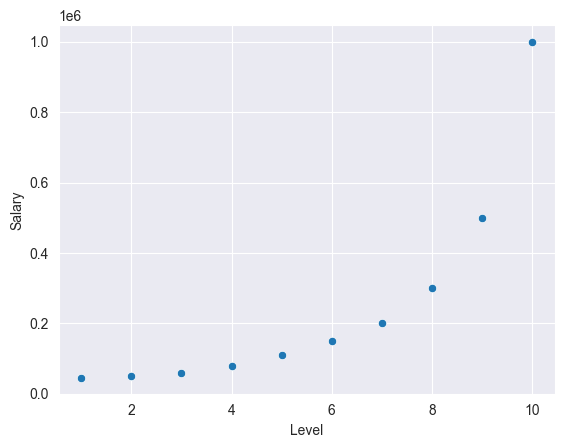

In [4]:
sns.scatterplot(data=data, x="Level", y="Salary")

## Getting Dependent and Independent Variable

In [5]:
x = data.iloc[:, 1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y = data.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

We are not going to split the dataset because the values are very low

## Building the Model

### Fitting Linear Regression to the data

In [7]:
from sklearn.linear_model import LinearRegression

linear_regressor_1 = LinearRegression()

In [8]:
linear_regressor_1.fit(x, y)

LinearRegression()

### Fitting Polynomial Regression to the data

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=4)

In [10]:
x_poly = poly_regressor.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [11]:
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(x_poly, y)

LinearRegression()

## Visualizing Linear Regression

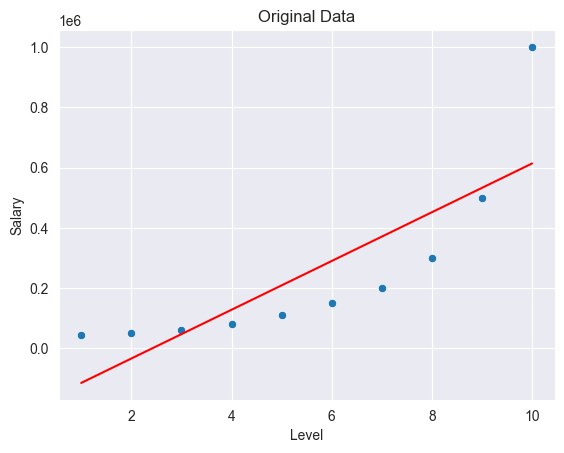

In [12]:
sns.scatterplot(x=x[:, 0], y=y)
sns.lineplot(x=x[:, 0], y=linear_regressor_1.predict(x), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Original Data")
plt.show()

## Visualizing Polynomial Regression

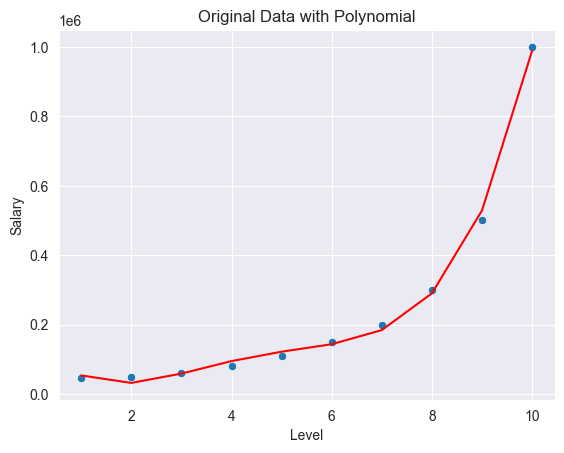

In [13]:
sns.scatterplot(x=x[:, 0], y=y)
sns.lineplot(x=x[:, 0], y=linear_regressor_2.predict(x_poly), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Original Data with Polynomial")
plt.show()

For more smoother curve

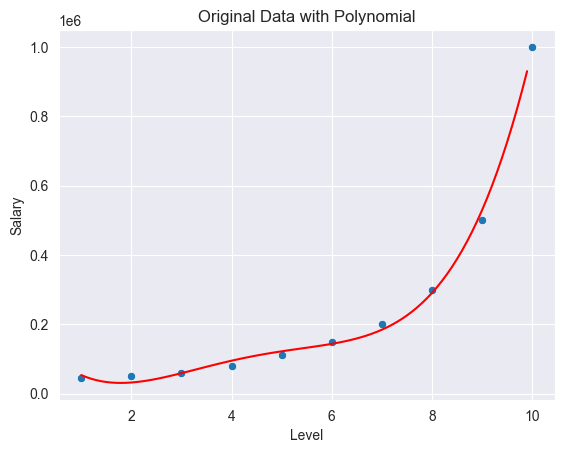

In [14]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
sns.scatterplot(x=x[:, 0], y=y)
sns.lineplot(x=x_grid[:, 0], y=linear_regressor_2.predict(poly_regressor.fit_transform(x_grid)), color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Original Data with Polynomial")
plt.show()

## Predicting with Linear Model

In [15]:
linear_regressor_1.predict([[6.5]])

array([330378.78787879])

## Predicting with Polynomial Model

In [16]:
linear_regressor_2.predict(poly_regressor.fit_transform([[6.5]]))  

array([158862.45265155])